In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [7]:
data = pd.read_csv('dataset.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.size

4242

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data_dup = data.duplicated().any()

In [12]:
data_dup

True

In [13]:
data = data.drop_duplicates()

In [14]:
data_dup = data.duplicated().any()

In [15]:
data_dup

False

In [16]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [19]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [20]:
cate_val.remove('sex')
cate_val.remove('target')
data1 = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [21]:
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [24]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [26]:
import pandas as pd


In [27]:
X_train = data.drop('target', axis=1)
y_train = data['target']
X_test = data.drop('target', axis=1)
y_test = data['target']

In [28]:
logreg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)


In [29]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('svm',svm),('rf', rf),('dt',dt)], voting='hard')


In [30]:
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('svm', SVC(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [31]:
y_pred = voting_clf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test ,y_pred)


In [33]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1_score)

Accuracy: 0.9768211920529801
Precision: 1.0
Recall: 0.9573170731707317
f1_score: 0.9781931464174455



# dataset2


In [34]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [35]:
data = pd.read_csv('heart (1).csv')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [37]:
data.size

14350

In [38]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
data_dup = data.duplicated().any()

In [40]:
data_dup

True

In [41]:
data = data.drop_duplicates()

In [42]:
data_dup = data.duplicated().any()

In [43]:
data_dup

False

In [44]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [45]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [46]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [47]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [48]:

cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [49]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [50]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [51]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [52]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [53]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [54]:
X_train = data.drop('target', axis=1)
y_train = data['target']
X_test = data.drop('target', axis=1)
y_test = data['target']

In [55]:
logreg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

In [56]:
voting_clf = VotingClassifier(estimators=[('lr', logreg),('rf', rf), ('dt', dt),('SVM',svm)], voting='hard')


In [57]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('SVM', SVC(random_state=42))])

In [58]:
y_pred = voting_clf.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)


In [60]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1_score)


Accuracy: 0.9701986754966887
Precision: 1.0
Recall: 0.9451219512195121
f1_score: 0.9717868338557993


# dataset3

In [61]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [62]:
data = pd.read_csv('heart (2).csv')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       918 non-null    int64  
 1   Sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    int64  
 4   chol      918 non-null    int64  
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalach   918 non-null    int64  
 8   exang     918 non-null    object 
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  target    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [64]:
data.size

11016

In [65]:
data.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [66]:
data_dup = data.duplicated().any()

In [67]:
data_dup

False

In [68]:
data = data.drop_duplicates()

In [69]:
data_dup = data.duplicated().any()

In [70]:
data_dup

False

In [71]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [72]:
cate_val

['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']

In [73]:
cont_val

['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [74]:
data['cp'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [75]:

cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [76]:
cate_val

['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

In [77]:
data.head()

,Age,trestbps,chol,thalach,oldpeak,target,Sex_1,Sex_F,Sex_M,cp_ATA,cp_NAP,cp_TA,fbs_1,restecg_Normal,restecg_ST,exang_Y,slope_Flat,slope_Up
0,40,140,289,172,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,1,0,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [78]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [79]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [80]:
data.head()

,Age,trestbps,chol,thalach,oldpeak,target,Sex_1,Sex_F,Sex_M,cp_ATA,cp_NAP,cp_TA,fbs_1,restecg_Normal,restecg_ST,exang_Y,slope_Flat,slope_Up
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,0,0,0,1,0,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,0,0,0,0,1,0,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,0,0,0,1,0,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,1,0,0,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,0,0,0,0,1,0,0,1,0,0,0,1


In [81]:
X_train = data.drop('target', axis=1)
y_train = data['target']
X_test = data.drop('target', axis=1)
y_test = data['target']

In [82]:
logreg = LogisticRegression(random_state=42)
#svm = SVC(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

In [83]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('KNN',knn),('rf',rf),('dt', dt)], voting='hard')


In [84]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [85]:
y_pred = voting_clf.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [87]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1_score)

Accuracy: 0.9738562091503268
Precision: 1.0
Recall: 0.952755905511811
f1_score: 0.9758064516129031



# dataset4

In [88]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [89]:
data = pd.read_csv('heart_data.csv')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [91]:
data.size

4242

In [92]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [93]:
data_dup = data.duplicated().any()

In [94]:
data_dup

True

In [95]:
data = data.drop_duplicates()

In [96]:
data_dup = data.duplicated().any()

In [97]:
data_dup

False

In [98]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [99]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [100]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [101]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [102]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [103]:
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [104]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [105]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [106]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [107]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [108]:
X_train = data.drop('target', axis=1)
y_train = data['target']
X_test = data.drop('target', axis=1)
y_test = data['target']

In [109]:
logreg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
#knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

In [110]:
voting_clf = VotingClassifier(estimators=[('lr', logreg),('SVM',svm),('rf',rf),('dt', dt)], voting='hard')


In [111]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('SVM', SVC(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [112]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('SVM', SVC(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [113]:
y_pred = voting_clf.predict(X_test)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score =f1_score(y_test, y_pred)

In [115]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:",f1_score)

Accuracy: 0.9701986754966887
Precision: 1.0
Recall: 0.9451219512195121
f1_score: 0.9717868338557993


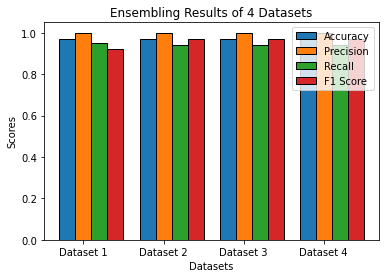

In [30]:
import matplotlib.pyplot as plt

# Sample data
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
accuracy = [0.97, 0.97, 0.97, 0.97]
precision = [1.0, 1.0, 1.0, 1.0]
recall = [0.95, 0.94, 0.94, 0.94]
f1_score = [0.92, 0.97, 0.97, 0.97]

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(datasets))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the barplot
plt.bar(r1, accuracy,  width=bar_width, edgecolor='black',label='Accuracy')
plt.bar(r2, precision, width=bar_width, edgecolor='black', label='Precision')
plt.bar(r3, recall, width=bar_width, edgecolor='black', label='Recall')
plt.bar(r4, f1_score,  width=bar_width, edgecolor='black', label='F1 Score')

# Add x-axis ticks and labels
plt.xlabel('Datasets')
plt.xticks([r + bar_width for r in range(len(datasets))], datasets)

# Add y-axis label
plt.ylabel('Scores')

# Add a legend
plt.legend()

# Set the title of the plot
plt.title('Ensembling Results of 4 Datasets')

# Display the plot
plt.show()

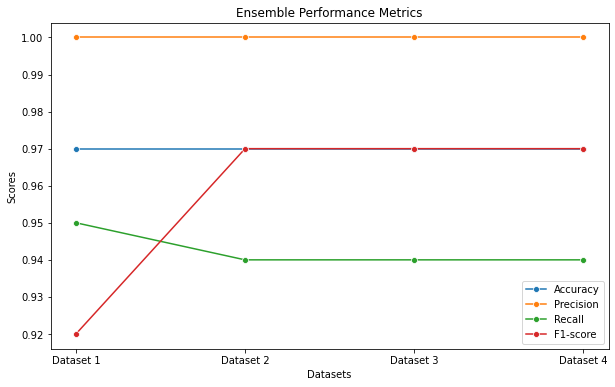

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for accuracy, precision, recall, and F1-score
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
accuracy = [0.97, 0.97, 0.97, 0.97]
precision = [1.0, 1.0, 1.0, 1.0]
recall = [0.95, 0.94, 0.94, 0.94]
f1_score = [0.92, 0.97, 0.97, 0.97]


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy
sns.lineplot(x=datasets, y=accuracy, marker='o', label='Accuracy')

# Plot precision
sns.lineplot(x=datasets, y=precision, marker='o', label='Precision')

# Plot recall
sns.lineplot(x=datasets, y=recall, marker='o', label='Recall')

# Plot F1-score
sns.lineplot(x=datasets, y=f1_score, marker='o', label='F1-score')

# Set labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Scores')
ax.set_title('Ensemble Performance Metrics')

# Customize legend
plt.legend()

# Show the plot
plt.show()
